# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Install Packages

Install packages not yet in the system

In [1]:
import sys

!conda install --yes --prefix {sys.prefix} geopandas
!conda install --yes --prefix {sys.prefix} descartes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# shapes
print(f"""
df_hh_income: {df_hh_income.shape}
df_pct_poverty: {df_pct_poverty.shape}
df_pct_completed_hs: {df_pct_completed_hs.shape}
df_share_race_city: {df_share_race_city.shape}
df_fatalities: {df_fatalities.shape}
""")


df_hh_income: (29322, 3)
df_pct_poverty: (29329, 3)
df_pct_completed_hs: (29329, 3)
df_share_race_city: (29268, 7)
df_fatalities: (2535, 14)



In [6]:
# column names
print(f"""
df_hh_income: 
{df_hh_income.columns}
df_pct_poverty: 
{df_pct_poverty.columns}
df_pct_completed_hs: 
{df_pct_completed_hs.columns}
df_share_race_city: 
{df_share_race_city.columns}
df_fatalities: 
{df_fatalities.columns}
""")


df_hh_income: 
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty: 
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs: 
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city: 
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities: 
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



## Data Cleaning - Check for Missing Values and Duplicates


### Missing Values

In [7]:
# check for NaN
print(f"""
df_hh_income: {df_hh_income.isna().values.any()}
df_pct_poverty: {df_pct_poverty.isna().values.any()}
df_pct_completed_hs: {df_pct_completed_hs.isna().values.any()}
df_share_race_city: {df_share_race_city.isna().values.any()}
df_fatalities: {df_fatalities.isna().values.any()}
""")


df_hh_income: True
df_pct_poverty: False
df_pct_completed_hs: False
df_share_race_city: False
df_fatalities: True



#### Missing values: df_hh_income

In [8]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [9]:
df_hh_income.info() # locate the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


There are 51 missing values in the <code>Median Income</code> column. Let's take a look.

In [10]:
df_hh_income[df_hh_income['Median Income'].isnull()]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


All the missing values have 'WY' as the geographic area and many of them have 'CDP' at the end. Thus, we can safely rule out that the missing values are <b>missing completely at random (MCAR)</b>. 
The data seems to be <b>missing at random (MAR)</b> because we can't ascertain what specifically is the related to the missing values.  

At this point, we have two options. Turn the NaN values into zero or try to estimate the missing data, perhaps with either the median or mean of the 'Median Income' column. As I'm not planning to make a model out of this dataset, I will turn them to zeros for simplicity sake.

In [11]:
df_hh_income.loc[df_hh_income['Median Income'].isna(), 'Median Income'] = 0

In [12]:
# assert there's no more missing values
df_hh_income.isna().values.any()

False

#### Missing values: df_fatalities

In [13]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [14]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [15]:
# check 'armed' 
df_fatalities[df_fatalities['armed'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,NaN,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,NaN,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,NaN,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,NaN,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,NaN,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,NaN,43.00,M,NaN,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,NaN,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


In [16]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

The most appropriate thing to do with these missing values is to change them to 'undetermined' as it's already part of the data. Check out the 'air conditioner'!

In [17]:
# change Nan values in 'armed' column to 'undetermined'
df_fatalities.loc[df_fatalities['armed'].isna(), 'armed'] = 'undetermined'

In [18]:
# check 'age' column
df_fatalities[df_fatalities['age'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


Dropping the nan values would delete other columns as well and most of them aren't missing any value. Changing them to zero doesn't make sense either cause they cannot be 0 years old. The only thing left to do is to estimate the missing age, in this case, I will use the average age of the dataset.

In [19]:
df_fatalities.loc[df_fatalities['age'].isna(), 'age'] = df_fatalities.age.mean()
df_fatalities.age.isna().any()

False

In [20]:
df_fatalities[df_fatalities['race'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
398,503,James Anthony Morris,31/05/15,shot,gun,40.00,M,NaN,Medford,OR,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,2811,Matthew Folden,27/07/17,shot,knife,31.00,M,NaN,Wenatchee,WA,False,other,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,36.61,M,NaN,Albuquerque,NM,False,attack,Car,False


A person's race can be ambiguous especially if they're of mix heritage. Similar to the <code>armed</code> column, I will use 'undetermined' to replace the missing values.

In [21]:
df_fatalities.loc[df_fatalities['race'].isna(), 'race'] = 'undetermined'
df_fatalities.race.isna().any()

False

In [22]:
df_fatalities[df_fatalities['flee'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
857,1007,Ernesto Gamino,13/11/15,shot,undetermined,25.00,M,H,Jurupa Valley,CA,False,undetermined,NaN,False
874,1020,Randy Allen Smith,19/11/15,shot,gun,34.00,M,B,Manatee,FL,False,attack,NaN,False
898,1042,Zachary Grigsby,29/11/15,shot,gun,29.00,M,W,Lincoln,NE,False,attack,NaN,False
935,1083,Roy Carreon,12/12/15,shot,knife,49.00,M,H,San Bernardino,CA,False,attack,NaN,False
936,1086,Efrain Villanueva,12/12/15,shot,unknown weapon,36.61,M,undetermined,Aurora,CO,False,attack,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2749,Carroll Tuttle,05/07/17,shot,gun,51.00,M,W,Madison,ME,False,attack,NaN,False
2468,2745,Dejuan Guillory,06/07/17,shot,undetermined,27.00,M,undetermined,Mamou,LA,False,undetermined,NaN,False
2482,2767,Caleb Edward Blaylock,11/07/17,shot,knife,27.00,M,undetermined,Las Vegas,NV,True,undetermined,NaN,True
2487,2772,James Gerald Davis,12/07/17,shot,undetermined,40.00,M,undetermined,Lake View,SC,False,undetermined,NaN,False


In [23]:
df_fatalities.flee.unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [24]:
df_fatalities.flee.value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

Again, it's really hard to ascertain if someone is fleeing in the heat of a shootout for the officer in field. If the offender was fleeing at first and stopped as they felt cornered and started to shoot at the police, are they still considered as fleeing in this dataset? I think the least bias way here is to simply change the missing values to 'Other'.

In [25]:
df_fatalities.loc[df_fatalities['flee'].isna(), 'flee'] = 'Other'
df_fatalities.flee.isna().any()

False

In [26]:
# one last check
df_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

### Duplicates

In [27]:
# check for duplicates
print(f"""
df_hh_income: {df_hh_income.duplicated().any()}
df_pct_poverty: {df_pct_poverty.duplicated().any()}
df_pct_completed_hs: {df_pct_completed_hs.duplicated().any()}
df_share_race_city: {df_share_race_city.duplicated().any()}
df_fatalities: {df_fatalities.duplicated().any()}
""")


df_hh_income: False
df_pct_poverty: False
df_pct_completed_hs: False
df_share_race_city: False
df_fatalities: False



No duplicates.

# Poverty Rate in each US State

Ranking the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate? 

In [28]:
df_pct_poverty.head() # relevant df

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [29]:
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

Need to convert <code>poverty_rate</code> to numeric.

Upon inspection, the 'poverty_rate' column contains "-" which causes error if we tried to convert it to numeric. Let's take a look at how many "-" we have here.

In [30]:
df_pct_poverty.loc[df_pct_poverty['poverty_rate'] == '-']

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


I have to drop these rows to be able to change the column to numerical data.

In [31]:
# drop the rows with '-'
df_pct_poverty = df_pct_poverty[df_pct_poverty['poverty_rate'] != '-'] 

# change poverty_rate to numeric
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df_pct_poverty.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

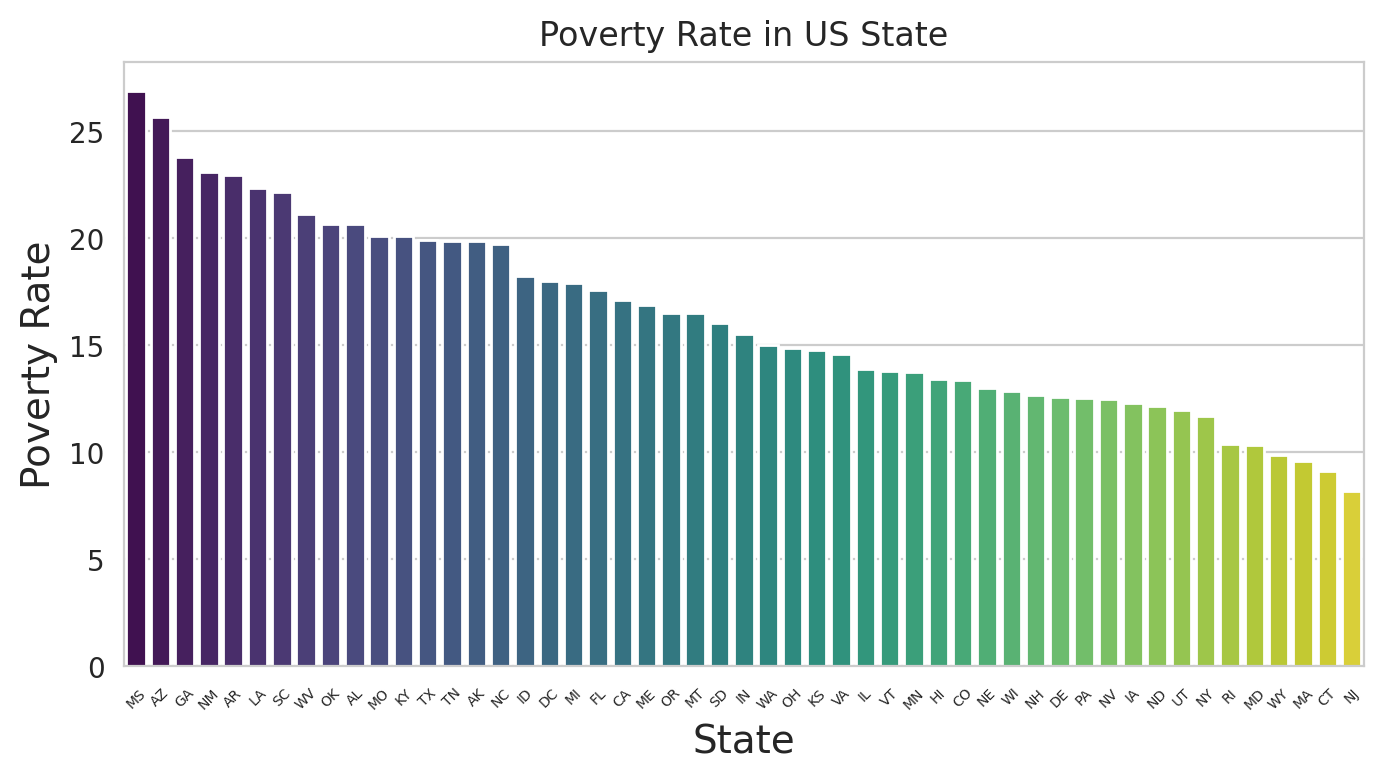

In [32]:
# create the dataframe for generating the bar chart
pvt_rate_by_state = df_pct_poverty.groupby('Geographic Area', as_index=False)\
                                    .agg(avg_pvt_rate=('poverty_rate', 'mean'))

# sort from highest to lowest
pvt_rate_by_state.sort_values('avg_pvt_rate', ascending=False, inplace=True)


plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.barplot(data=pvt_rate_by_state,
                x='Geographic Area',
                y='avg_pvt_rate',
                palette='viridis')
plt.xticks(fontsize=5,
           rotation=45)
plt.xlabel('State',
           fontsize=14)
plt.ylabel('Poverty Rate',
            fontsize=14)
plt.title('Poverty Rate in US State')
plt.show()

Mississippi (MS) has the highest average poverty rate at around 28%. I certainly didn't expect the rate to be that high for any US state! Whereas, New Jersey (NJ) has the lowest rate at around 8%.

# High School Graduation Rate by US State

Ranking the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [33]:
# relevant df
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [34]:
df_pct_completed_hs.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

Similar to <code>df_pct_poverty</code>, let's check for "-" in the <code>percent_completed_hs</code> column.

In [35]:
df_pct_completed_hs.loc[df_pct_completed_hs['percent_completed_hs'] == '-']

,Geographic Area,City,percent_completed_hs
573,AL,Whatley CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
667,AK,Edna Bay city,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [36]:
# drop the rows with '-'
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] != '-']

# change to numeric
df_pct_completed_hs.loc[:, 'percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
df_pct_completed_hs.dtypes

Geographic Area          object
City                     object
percent_completed_hs    float64
dtype: object

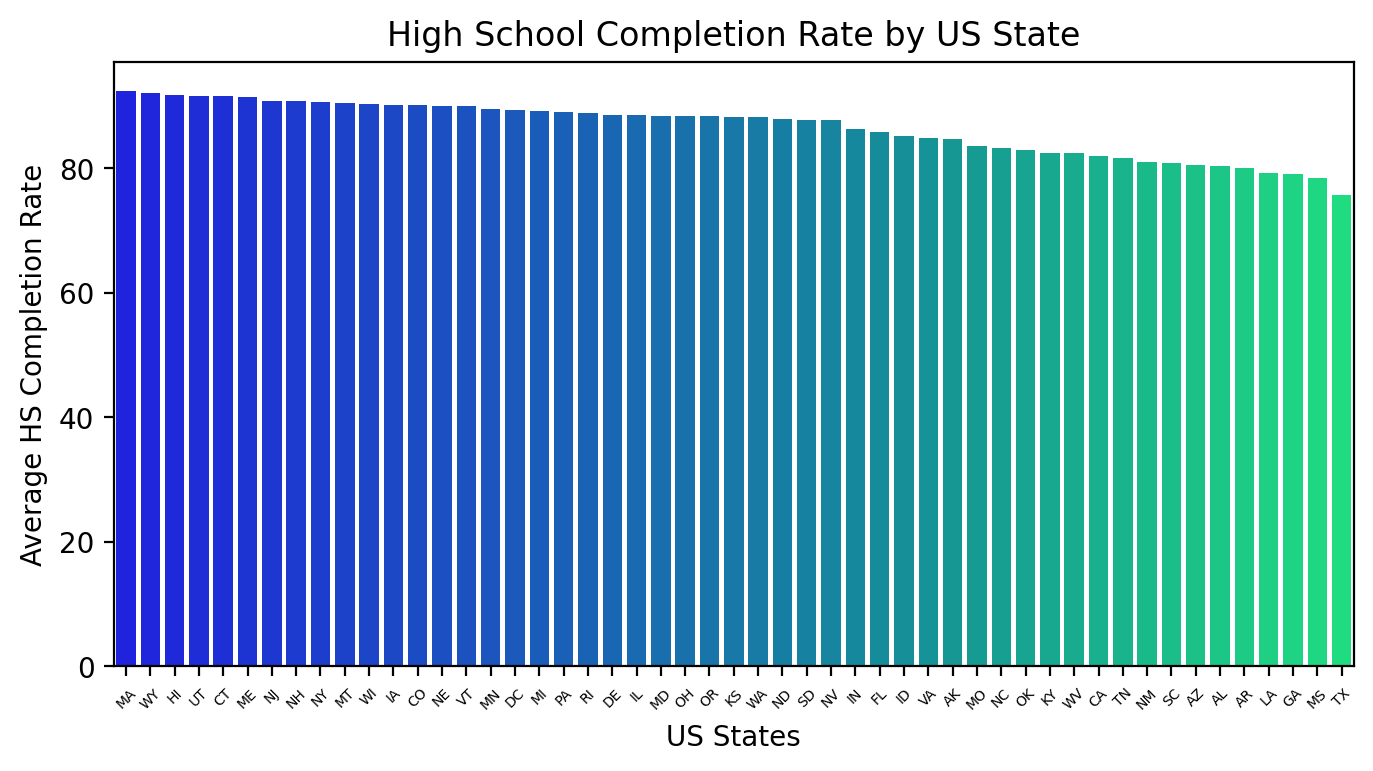

In [37]:
hs_completed_by_state = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg(avg_completion_rate=('percent_completed_hs', 'mean'))

# sort
hs_completed_by_state.sort_values('avg_completion_rate', ascending=False, inplace=True)

# plot bar chart
plt.figure(figsize=(8,4), dpi=200)

sns.barplot(data=hs_completed_by_state,
            x='Geographic Area',
            y='avg_completion_rate',
            palette='winter')
plt.xticks(fontsize=5, rotation=45)
plt.xlabel('US States')
plt.ylabel('Average HS Completion Rate')
plt.title('High School Completion Rate by US State')
plt.show()

Interesting to see that MS has the second lowest high school completion rate. Georgia (GA) is top 3 for poverty rate and also bottom 3 for high school completion. Do higher poverty rate lowers high school completion rate?

# Relationship between Poverty Rates and High School Graduation Rates


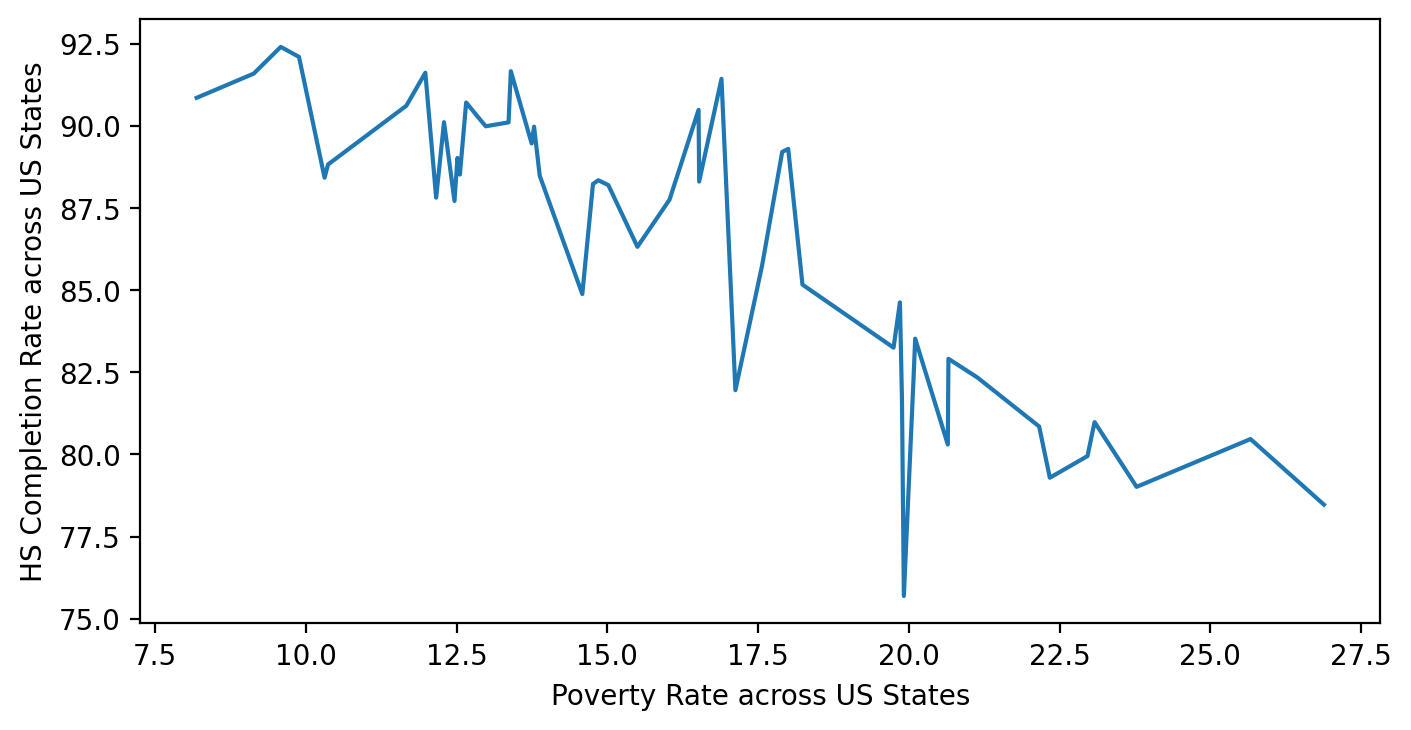

In [38]:
# new df
poverty_hsgrad = pvt_rate_by_state.merge(hs_completed_by_state, on='Geographic Area')

# line chart to see relationship
plt.figure(figsize=(8,4), dpi=200)

sns.lineplot(data=poverty_hsgrad,
             x='avg_pvt_rate',
             y='avg_completion_rate')

plt.xlabel('Poverty Rate across US States')
plt.ylabel('HS Completion Rate across US States')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

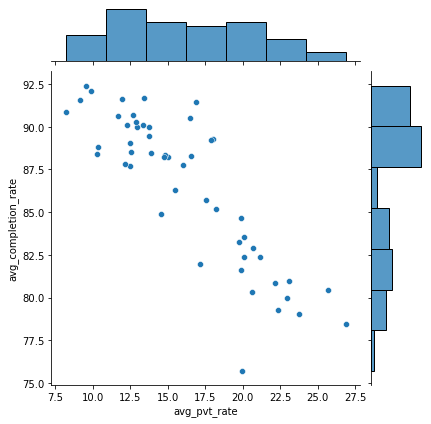

In [39]:
# jointplot()
sns.jointplot(data=poverty_hsgrad, x='avg_pvt_rate', y='avg_completion_rate', kind='scatter')
plt.show()

The charts appear to follow an observable trend. The higher the poverty rate, the lower the high school completion rate would be and vice versa.

#### Seaborn's `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

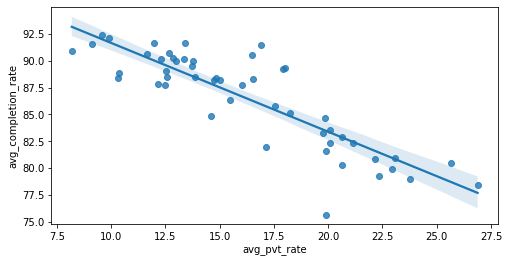

In [40]:
plt.figure(figsize=(8,4))
sns.regplot(data=poverty_hsgrad, x='avg_pvt_rate', y='avg_completion_rate')
plt.show()

# Racial Makeup of Each US State

Here I visualise the share of white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [41]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [42]:
# check data types
df_share_race_city.dtypes

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

Some rows have the string '(X)' as the share of races. I'll remove these rows.

In [43]:
# remove (X) rows
df_share_race_city = df_share_race_city[df_share_race_city.share_white != '(X)']

race_cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

df_share_race_city[race_cols] = df_share_race_city[race_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [44]:
df_share_race_city.dtypes # check if it's working

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

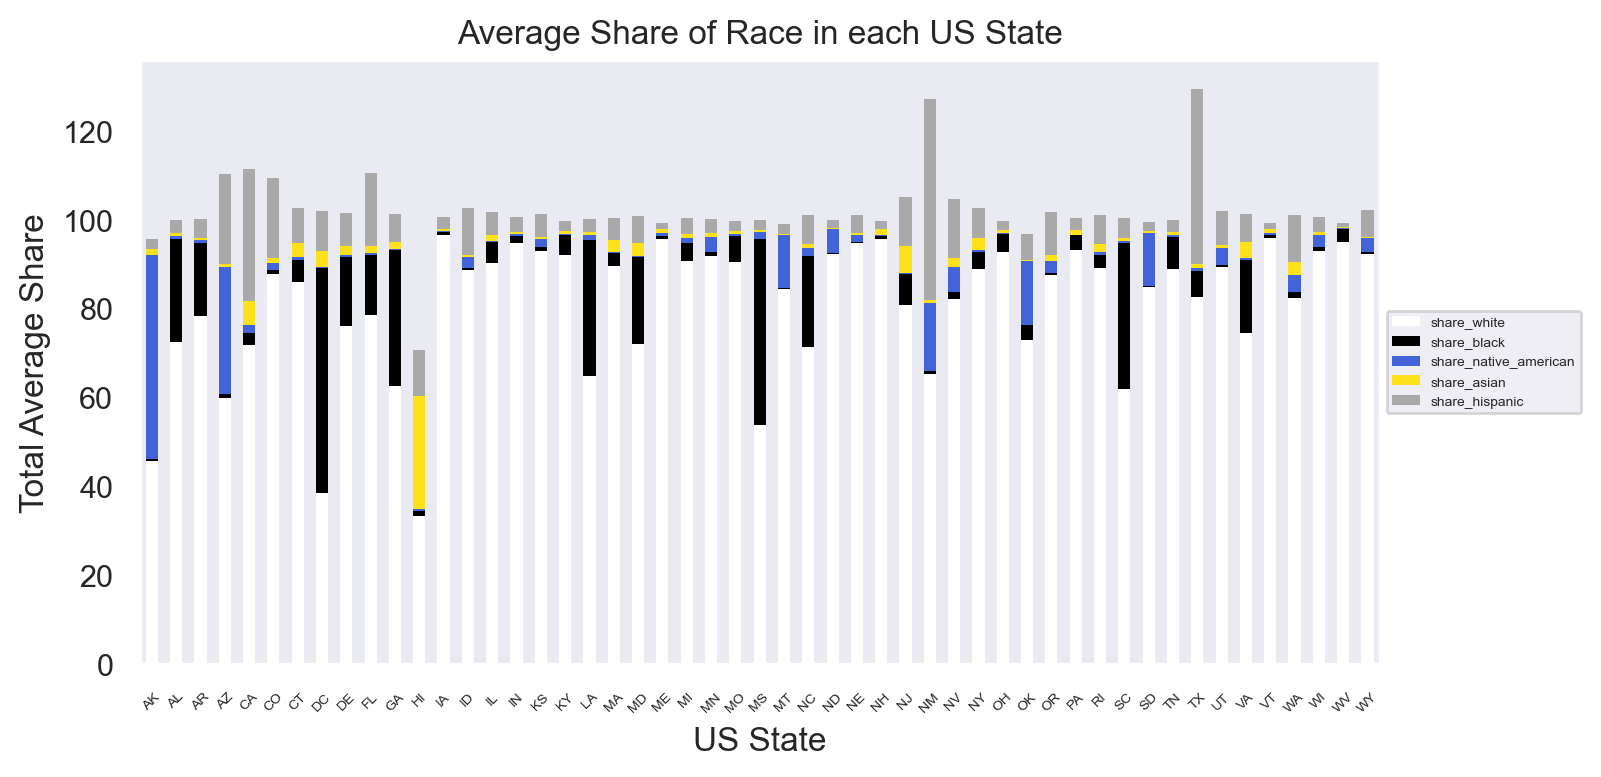

In [45]:
# groupby state
share_race_state = df_share_race_city.groupby('Geographic area', as_index=False).agg({'share_white': pd.Series.mean,
                                                                                      'share_black': pd.Series.mean,
                                                                                      'share_native_american': pd.Series.mean,
                                                                                      'share_asian': pd.Series.mean,
                                                                                      'share_hispanic': pd.Series.mean})

# barplot
sns.set()
color_list = ['#ffffff', '#000000', '#4363d8', '#ffe119', '#a9a9a9']
plt.rcParams["figure.dpi"] = 200
share_race_state.set_index('Geographic area').plot(figsize=(8,4), kind='bar', stacked=True, color=color_list, linewidth=0)
plt.xticks(fontsize=5, rotation=45)
plt.xlabel('US State')
plt.ylabel('Total Average Share')
plt.legend(fontsize=5, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(False)
plt.title('Average Share of Race in each US State')
plt.show()

Here we can where specific race tends to live. New Mexico (NM) and Texas (TX) has high share of hispanic people, whereas a high share of Asian people are seen in Hawaii (HI). How are rate of fatal police shooting in relation to race share? Do race plays a role in how likely it is for a person to be shot by the police? 

# Proportion of People Killed by Race

Looking at the racial makeup of people killed by their race.

In [46]:
# relevant df
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


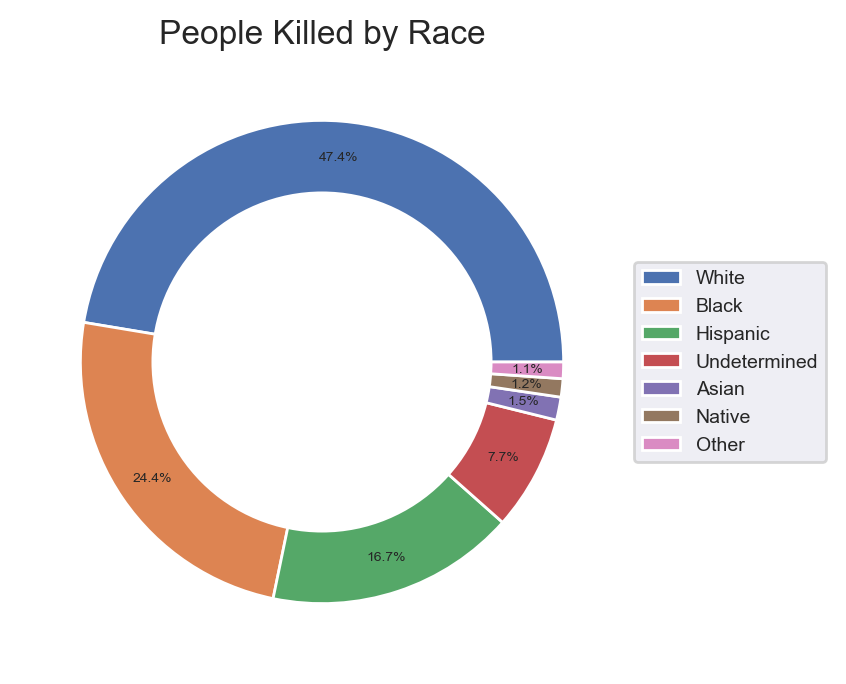

In [47]:
ppl_killed_by_race = df_fatalities.race.value_counts()

# pie chart
sns.set()
plt.pie(ppl_killed_by_race.values, 
        autopct='%1.1f%%', 
        pctdistance=0.85, 
        textprops={'fontsize': 5})

# draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()

# add circle/donut hole in pie chart
fig.gca().add_artist(centre_circle)

# labels
labels = ['White', 'Black', 'Hispanic', 'Undetermined', 'Asian', 'Native', 'Other']
plt.title('People Killed by Race')
plt.legend(labels, fontsize=7, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Based on the race share in US State above, the proportion of people killed by race that happens to be Black seems quite high in comparison to others. White people are the overwhelming majority in most states and yet make up only less than half of this pie chart.

There might be some correlation between race and fatalities by police shooting. 

# Comparing the Total Number of Deaths of Men and Women

Now, I'll visualise the fatalities based on gender.

In [48]:
ppl_killed_by_gender = df_fatalities.gender.value_counts()
ppl_killed_by_gender.sort_values(inplace=True)

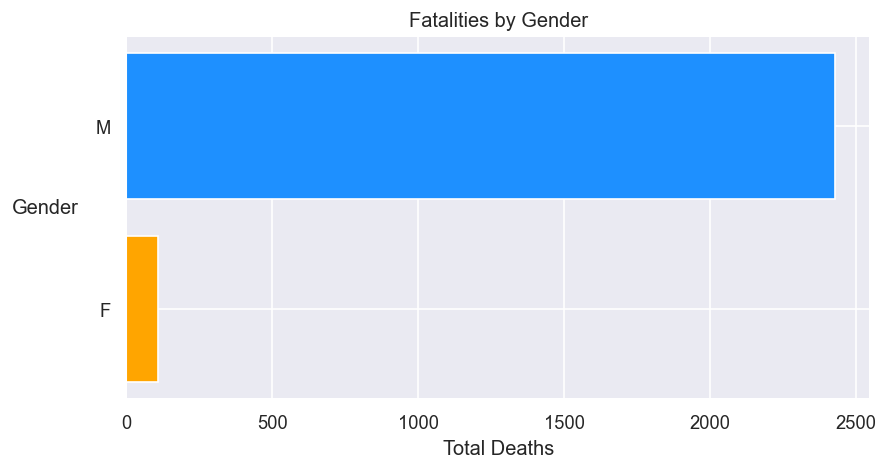

In [49]:
plt.figure(figsize=(8,4), dpi=120)

plt.barh(y=ppl_killed_by_gender.index,
        width=ppl_killed_by_gender.values,
        color=('orange', 'dodgerblue'))
plt.xlabel('Total Deaths')
plt.ylabel('Gender', rotation=0, labelpad=30)
plt.title('Fatalities by Gender')
plt.show()

The overwhelming majority of deaths are male. More than 20 times of that for females. 

# Age and Manner of Death

Is there a difference between men and women in the manner of death? 

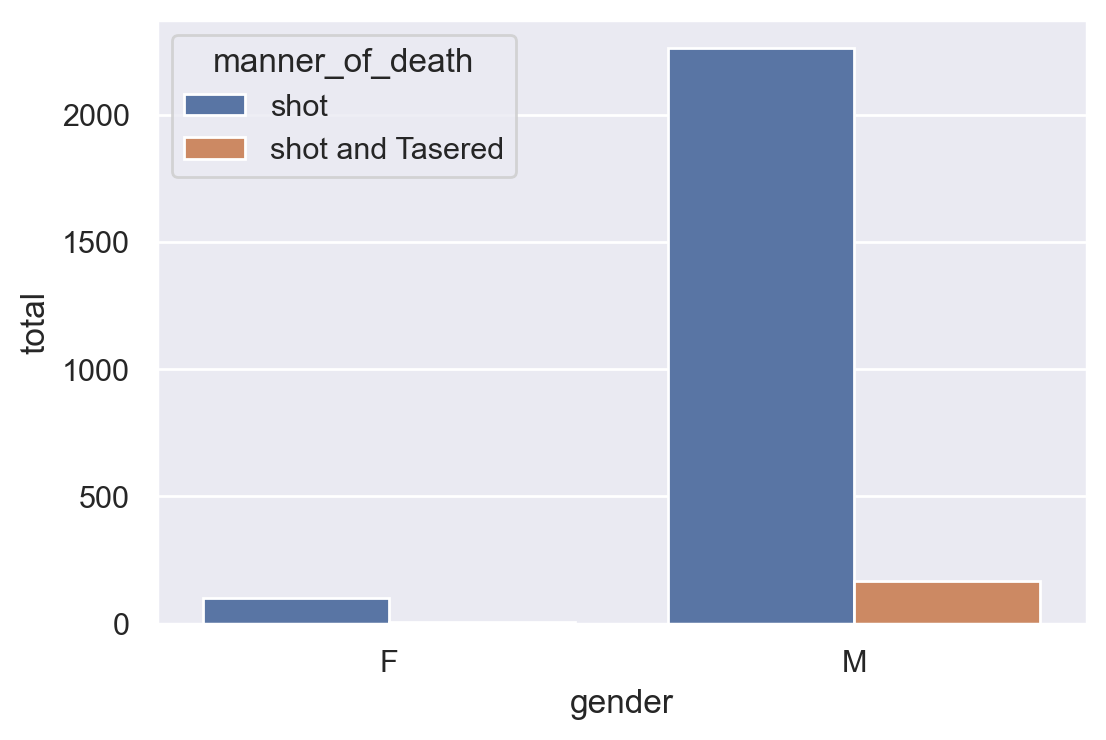

In [50]:
death_manner = df_fatalities.groupby(['gender','manner_of_death'], as_index=False).agg(total=('manner_of_death', 'count'))

sns.barplot(data=death_manner, x='gender', y='total', hue='manner_of_death')
plt.show()

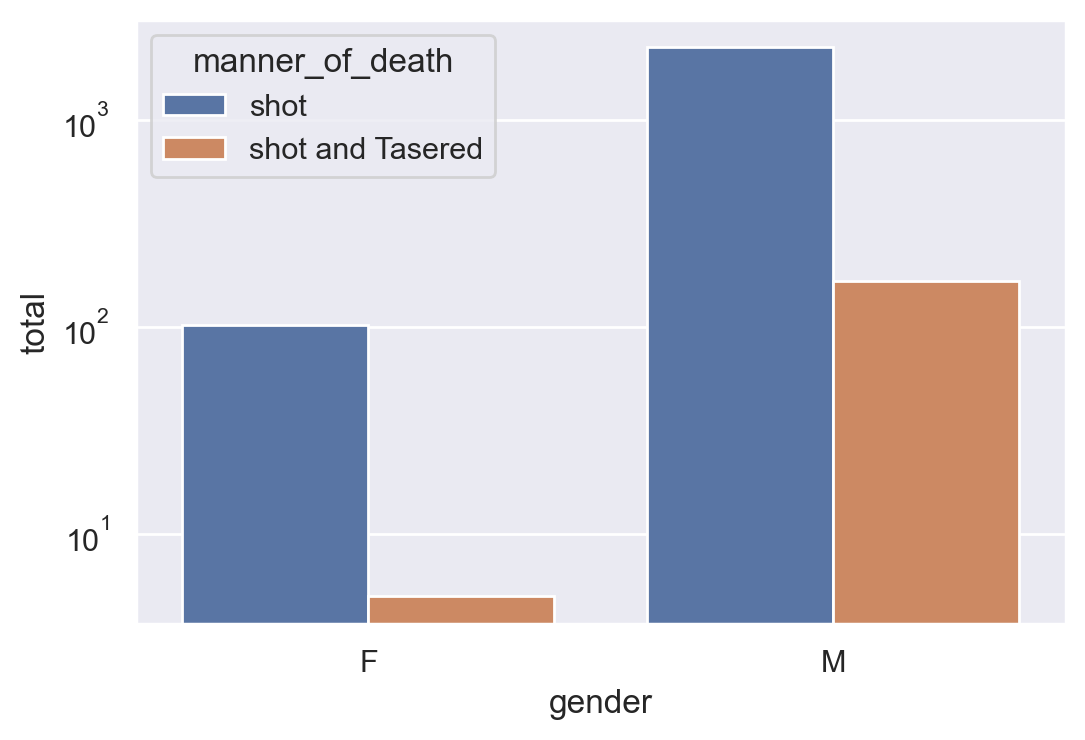

In [51]:
# try log scale
sns.barplot(data=death_manner, x='gender', y='total', hue='manner_of_death')
plt.yscale('log')
plt.show()

There doesn't seem to be a lot of difference in the manner of death for each gender. Most of the deceased are shot with the minority getting shot and tasered. 

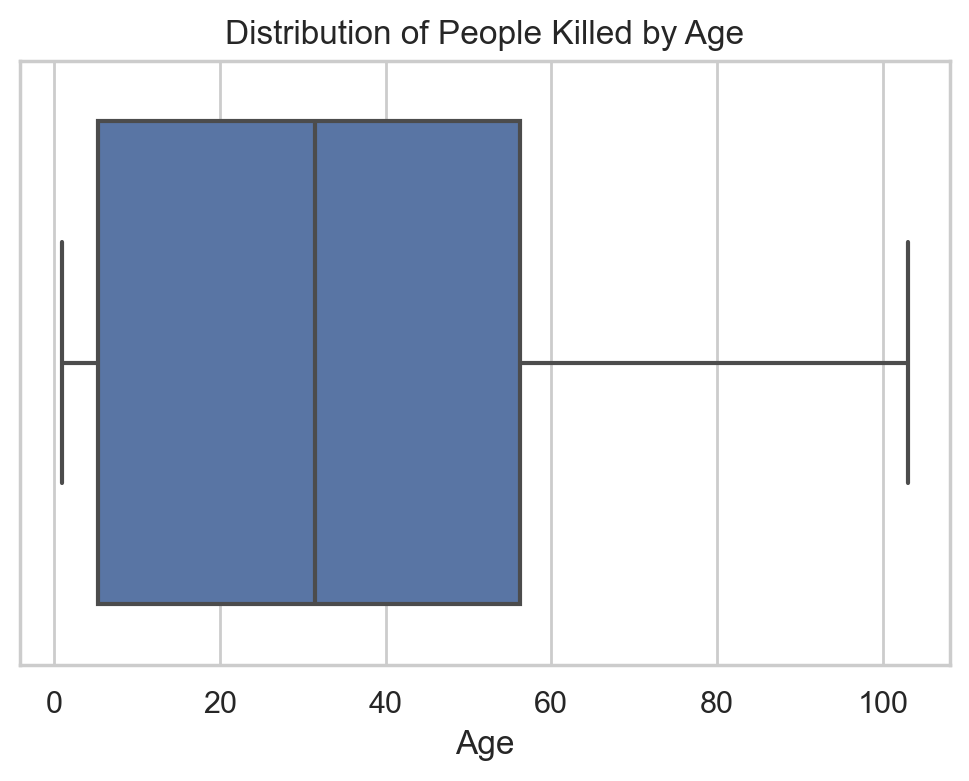

In [52]:
# box plot of age
ppl_killed_by_age = df_fatalities.age.value_counts()

sns.set(style='whitegrid')
sns.boxplot(x=ppl_killed_by_age.values)
plt.xlabel('Age')
plt.title('Distribution of People Killed by Age')
plt.show()

What about by gender? What are the median age for male and female? 

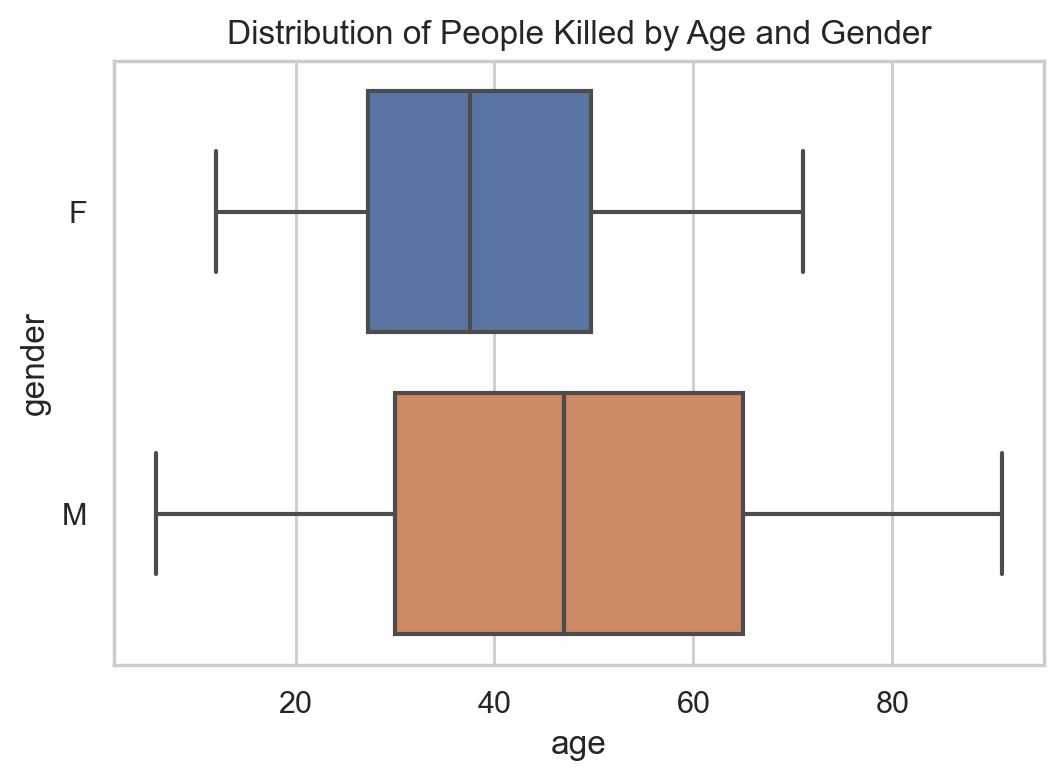

In [53]:
ppl_killed_age_gender = df_fatalities.groupby(['gender', 'age'], as_index=False).agg(total=('gender', 'count'))

sns.boxplot(data=ppl_killed_age_gender,
            x='age',
            y='gender')
plt.title('Distribution of People Killed by Age and Gender')
plt.show()

# Were People Armed? 

Now we look at the percentage of people killed based on their armaments.

In [54]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and kn

Plotting all the weapons in one chart is going to be messy and doesn't tell us much. With the variety of weapons we see, most of them are probably quite rare compared to guns. I'll simply handle this by changing the dataframe so we'd have guns, unarmed, and miscellaneous

In [55]:
df_fatalities.loc[~df_fatalities.armed.isin(['gun', 'unarmed']), 'armed'] = 'miscellaneous'
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'miscellaneous'], dtype=object)

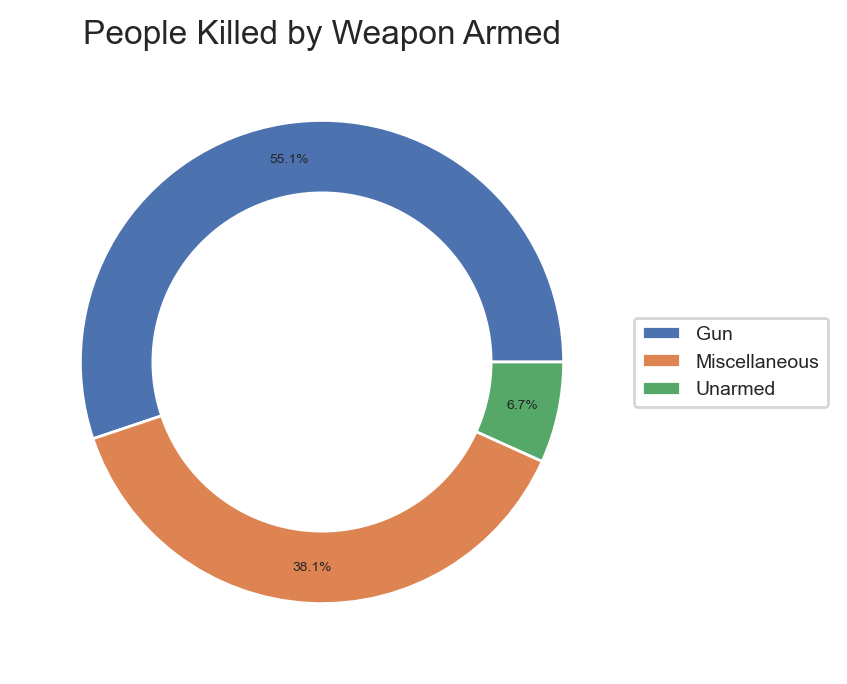

In [56]:
ppl_killed_by_arm = df_fatalities.armed.value_counts()

# pie chart
plt.pie(ppl_killed_by_arm.values, 
        autopct='%1.1f%%', 
        pctdistance=0.85, 
        textprops={'fontsize': 5})

# draw circle
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()

# add circle/donut hole in pie chart
fig.gca().add_artist(centre_circle)

# labels
labels = ['Gun', 'Miscellaneous', 'Unarmed']
plt.title('People Killed by Weapon Armed')
plt.legend(labels, fontsize=7, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

As expected, people who armed with a gun make up most the fatalities in contrast to unarmed people. All the unique weapons we see above in total only make up to a little over one-third of the casualties. Equipping a gun clearly makes it more likely for people to be shot

# How Old Were the People Killed?

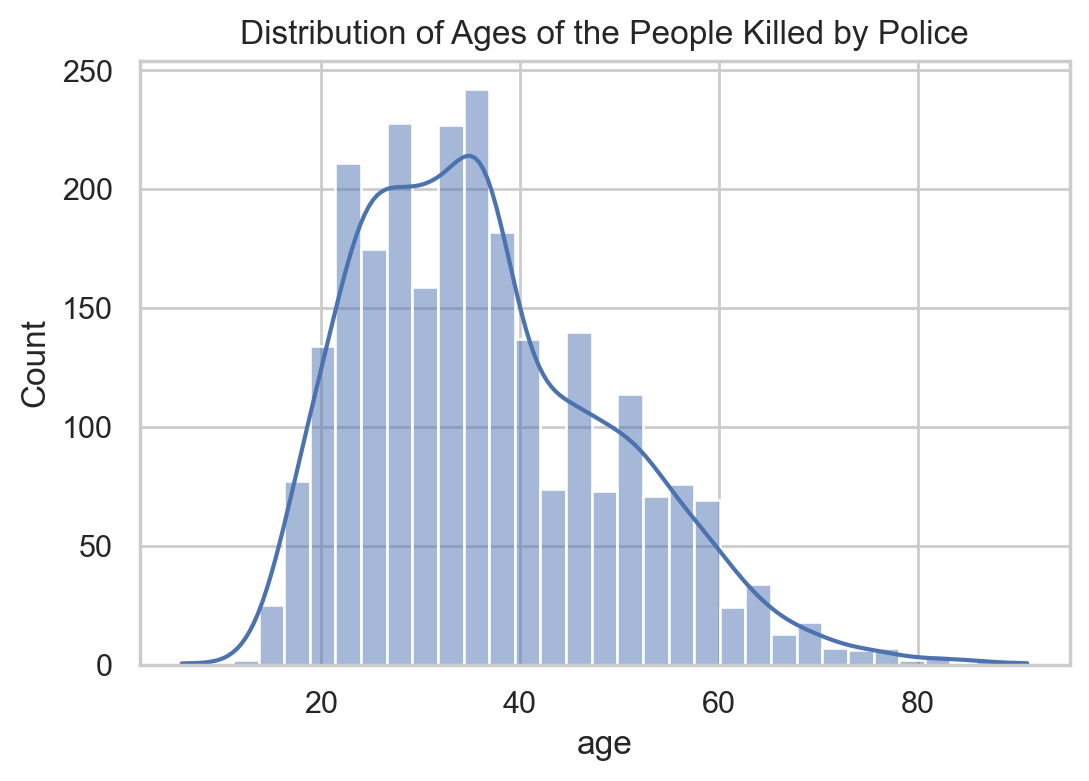

In [57]:
sns.histplot(data=df_fatalities,
             x='age',
             kde=True)
plt.title('Distribution of Ages of the People Killed by Police')
plt.show()

What about the distribution for each race? Is there a difference between the distributions? 

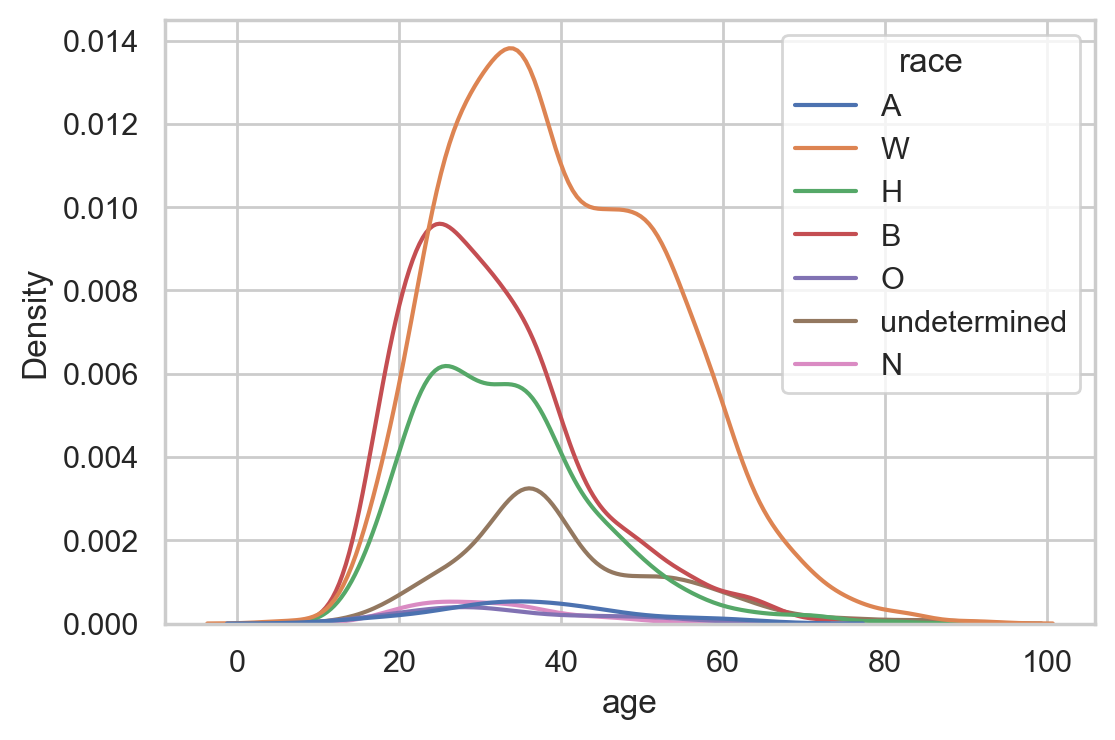

In [58]:
sns.kdeplot(data=df_fatalities,
            x='age',
            hue='race')
plt.show()

Most of the people killed are of young age, largely between 20-40 years old. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

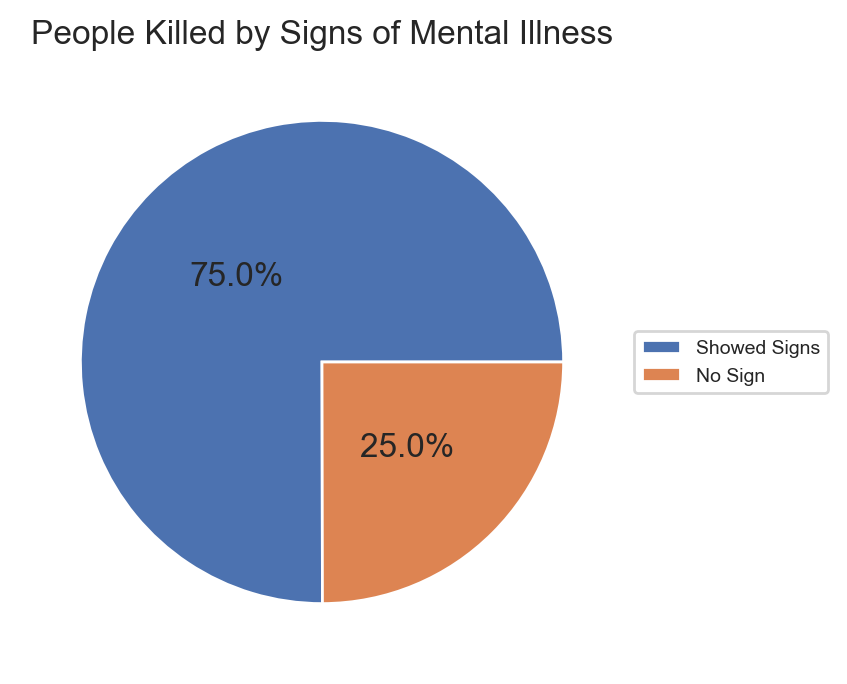

In [59]:
plt.pie(x= df_fatalities['signs_of_mental_illness'].value_counts(),
        autopct='%1.1f%%',
        pctdistance=0.5)

# labels
plt.title('People Killed by Signs of Mental Illness')
plt.legend(labels=['Showed Signs', 'No Sign'], 
           fontsize=7, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Which cities are the most dangerous?  

In [60]:
# find the top 10 cities
city_killcount = df_fatalities.groupby(['state','city'], as_index=False).agg(total=('city', 'count'))
top10_cities_killcount = city_killcount.sort_values('total', ascending=False)[:10]
top10_cities_killcount

,state,city,total
218,CA,Los Angeles,39
94,AZ,Phoenix,31
1314,TX,Houston,26
561,IL,Chicago,25
990,NV,Las Vegas,21
1360,TX,San Antonio,20
426,FL,Miami,17
1034,OH,Columbus,17
1274,TX,Austin,16
840,MO,St. Louis,15


Most of the killings take place in big cities, most likely due to the larger population in these areas, the total number is bound to be higher. 

# Rate of Death by Race

 

In [61]:
top10_city_race = df_share_race_city.loc[df_share_race_city['City'].isin(top10_cities_killcount.index)]
top10_city_race

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


Looks like there's some discrepancies between dataframes in terms of city names. Let's investigate.

In [62]:
df_share_race_city[df_share_race_city['City'].str.contains('Los Angeles')]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
2320,CA,East Los Angeles CDP,50.50,0.60,1.20,0.90,97.10
2474,CA,Green Valley CDP (Los Angeles County),87.70,0.80,1.10,1.20,12.00
2627,CA,Lake Los Angeles CDP,55.70,11.30,1.40,0.90,53.60
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
25400,TX,Los Angeles CDP,63.60,9.10,0.00,0.00,100.00


In <code>df_share_race_city</code> there's an additional 'city' at the end which is why we didn't get any return for <code>top10_city_race</code>

In [63]:
# new dataframe to contain the filtered rows
top10_city_share_race = pd.DataFrame()

# loop through the top 10 cities to match rows
for i in range(0, len(top10_cities_killcount.state)):
    row = top10_cities_killcount.iloc[i]
    # match both state and city names
    row_to_add = df_share_race_city[(df_share_race_city['Geographic area'] == row.state) & (df_share_race_city['City'] == f"{row.city} city")]
    # add the matching row to the new df
    top10_city_share_race = top10_city_share_race.append(row_to_add, ignore_index=True)

top10_city_share_race

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
1,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
2,TX,Houston city,50.50,23.70,0.70,6.00,43.80
3,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
4,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50
5,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20
6,FL,Miami city,72.60,19.20,0.30,1.00,70.00
7,OH,Columbus city,61.50,28.00,0.30,4.10,5.60
8,TX,Austin city,68.30,8.10,0.90,6.30,35.10
9,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50


Compare this with the kill count for these cities

In [64]:
top10_cities_fatal = df_fatalities[df_fatalities.city.isin(top10_cities_killcount.city)]

In [65]:
top10_fatal_by_race = top10_cities_fatal.groupby(['race','city'], as_index=False).agg(total_killed=('city', 'count'))
top10_fatal_by_race

,race,city,total_killed
0,A,Houston,1
1,A,Los Angeles,1
2,B,Austin,3
3,B,Chicago,21
4,B,Columbus,11
5,B,Houston,15
6,B,Las Vegas,3
7,B,Los Angeles,10
8,B,Miami,8
9,B,Phoenix,2


In [66]:
# pivot to enable stacked bar chart to be generated
df_pivot = top10_fatal_by_race.pivot(index='city', columns='race', values='total_killed')
df_pivot.fillna(0, inplace=True)
df_pivot

race,A,B,H,N,O,W,undetermined
city,,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,13.00,0.00
Chicago,0.00,21.00,1.00,0.00,0.00,2.00,1.00
Columbus,0.00,11.00,0.00,0.00,1.00,6.00,1.00
Houston,1.00,15.00,6.00,1.00,0.00,3.00,1.00
Las Vegas,0.00,3.00,5.00,0.00,0.00,9.00,4.00
Los Angeles,1.00,10.00,19.00,0.00,0.00,6.00,3.00
Miami,0.00,8.00,6.00,0.00,0.00,3.00,1.00
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00,3.00
San Antonio,0.00,3.00,12.00,0.00,0.00,3.00,2.00


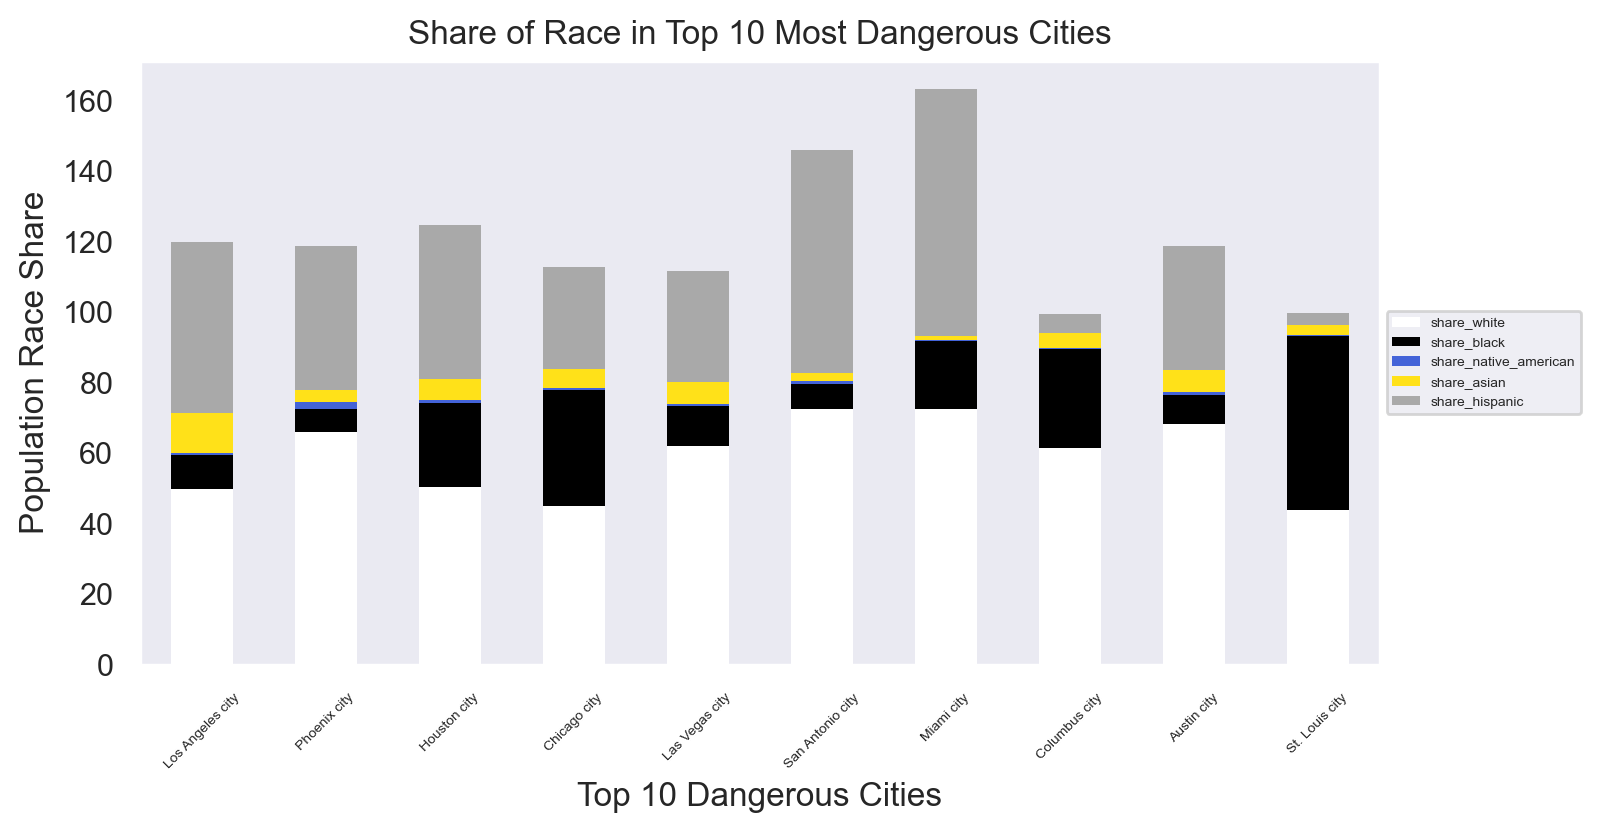

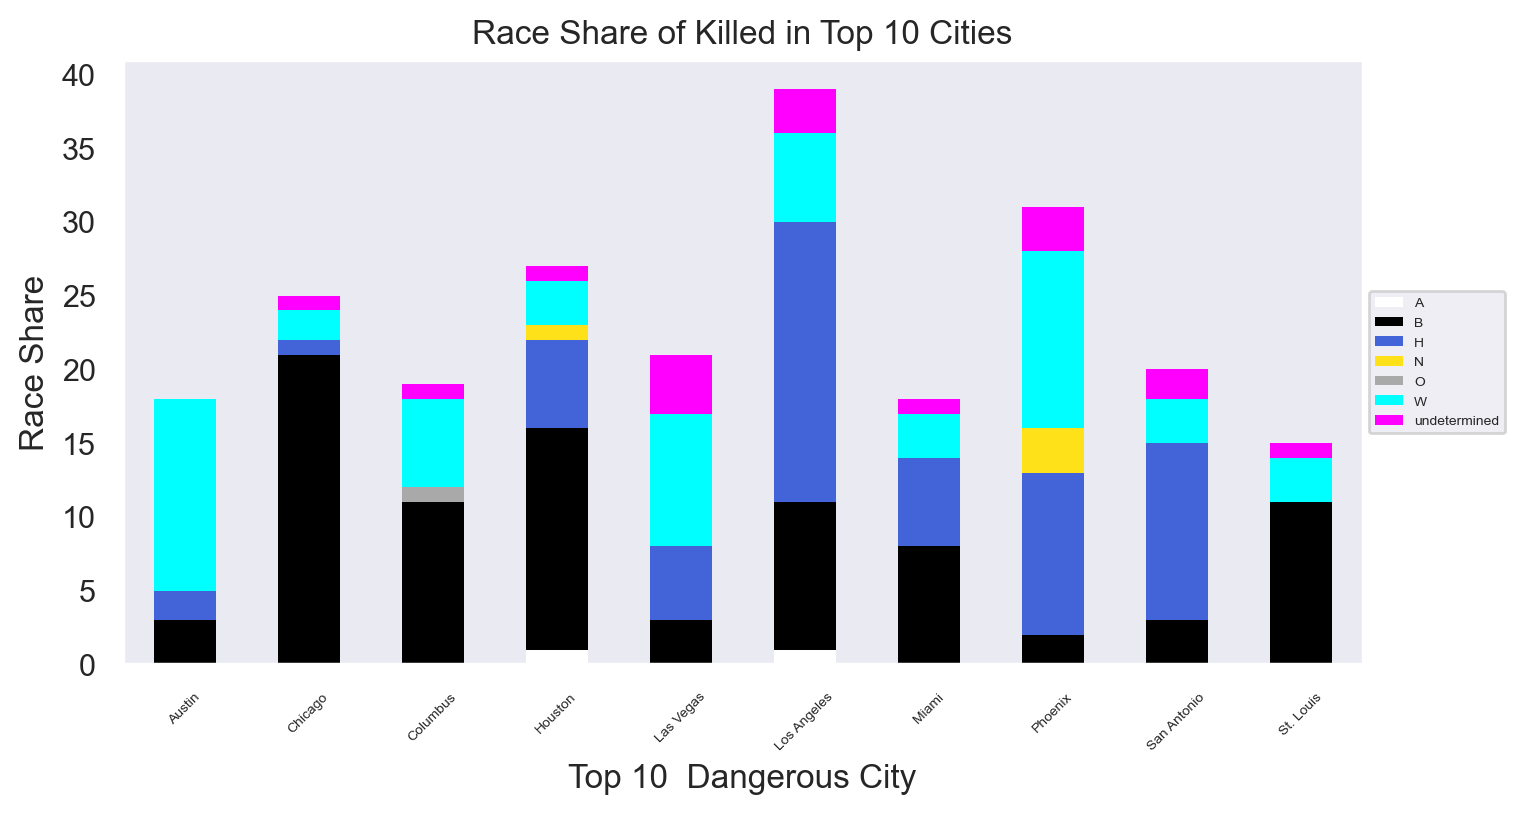

In [67]:
# plot share of each race in top 10 cities
# barplot
sns.set()

color_list = ['#ffffff', '#000000', '#4363d8', '#ffe119', '#a9a9a9']
plt.rcParams["figure.dpi"] = 200
top10_city_share_race.set_index('City').plot(figsize=(8,4), kind='bar', stacked=True, color=color_list, linewidth=0)
plt.xticks(fontsize=5, rotation=45)
plt.xlabel('Top 10 Dangerous Cities')
plt.ylabel('Population Race Share')
plt.legend(fontsize=5, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(False)
plt.title('Share of Race in Top 10 Most Dangerous Cities')
plt.show()

# plot share of each race killed in top 10 cities
color_list = ['#ffffff', '#000000', '#4363d8', '#ffe119', '#a9a9a9', 'cyan', 'magenta']
plt.rcParams["figure.dpi"] = 200
df_pivot.plot(figsize=(8,4), kind='bar', stacked=True, color=color_list, linewidth=0)
plt.xticks(fontsize=5, rotation=45)
plt.xlabel('Top 10  Dangerous City')
plt.ylabel('Race Share')
plt.legend(fontsize=5, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(False)
plt.title('Race Share of Killed in Top 10 Cities')
plt.show()

In Chicago, the overwhelming majority killed are black yet the city has a healthy share of white and hispanic population. Similarly in Los Angeles it's the hispanic who are killed the most but white only has a third of its number.
Asian being killed by police is quite rare, even only found in Houston and Los Angeles. 

There might indeed be a strong correlation between a person's race and the likelihood in which police decided to use fatal force when dealing with them. 

# Map of Police Killings by US State

Which states are the most dangerous? Are these the same states with high degrees of poverty? 

In [68]:
# police killing by state
state_fatalities = df_fatalities.groupby('state', as_index=False).agg(total=('state', 'count'))
state_fatalities.total.max()

424

In [69]:
geo_file = 'USA_adm/USA_adm1.shp'
map_df = gpd.read_file(geo_file)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,244,USA,United States,1,Alabama,State,State,None,AL|Ala.,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,244,USA,United States,2,Alaska,State,State,None,AK|Alaska,"MULTIPOLYGON (((-179.13147 51.20972, -179.1322..."
2,244,USA,United States,2,Alaska,State,State,None,AK|Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
3,244,USA,United States,3,Arizona,State,State,None,AZ|Ariz.,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
4,244,USA,United States,4,Arkansas,State,State,None,AR|Ark.,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."


(-180.0, -65.0)

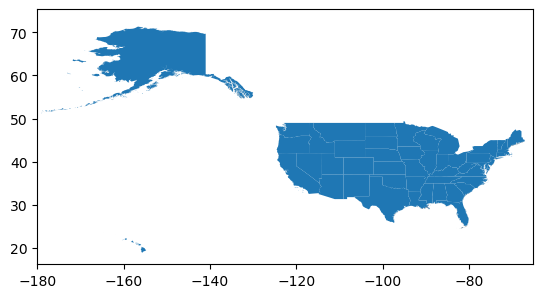

In [70]:
# test the map
plt.rcParams.update(plt.rcParamsDefault)
map_df.plot()
plt.xlim(-180, - 65)

To use <code>map_df</code> together with <code>state_fatalities</code>, we'll need to extract the 2 letters abbreviation from <code>VARNAME_1</code> so we can merge them.

In [71]:
map_df['state'] = map_df['VARNAME_1'].str.split('|').str[0]

We need to change the name of 4 states as they are slightly different and didn't get converted by the code.

In [72]:
map_df.loc[map_df.state == 'Commonwealth of Kentucky', 'state'] = 'KY'
map_df.loc[map_df.state == 'Commonwealth of Massachusetts', 'state'] = 'MA'
map_df.loc[map_df.state == 'Commonwealth of Pennsylvania', 'state'] = 'PA'
map_df.loc[map_df.state == 'State of Rhode Island and Providence Plantations', 'state'] = 'RI'

In [73]:
# merge dataframes
merged = state_fatalities.merge(map_df, how='left', on='state')[['state', 'geometry', 'total']]
merged= gpd.GeoDataFrame(merged)

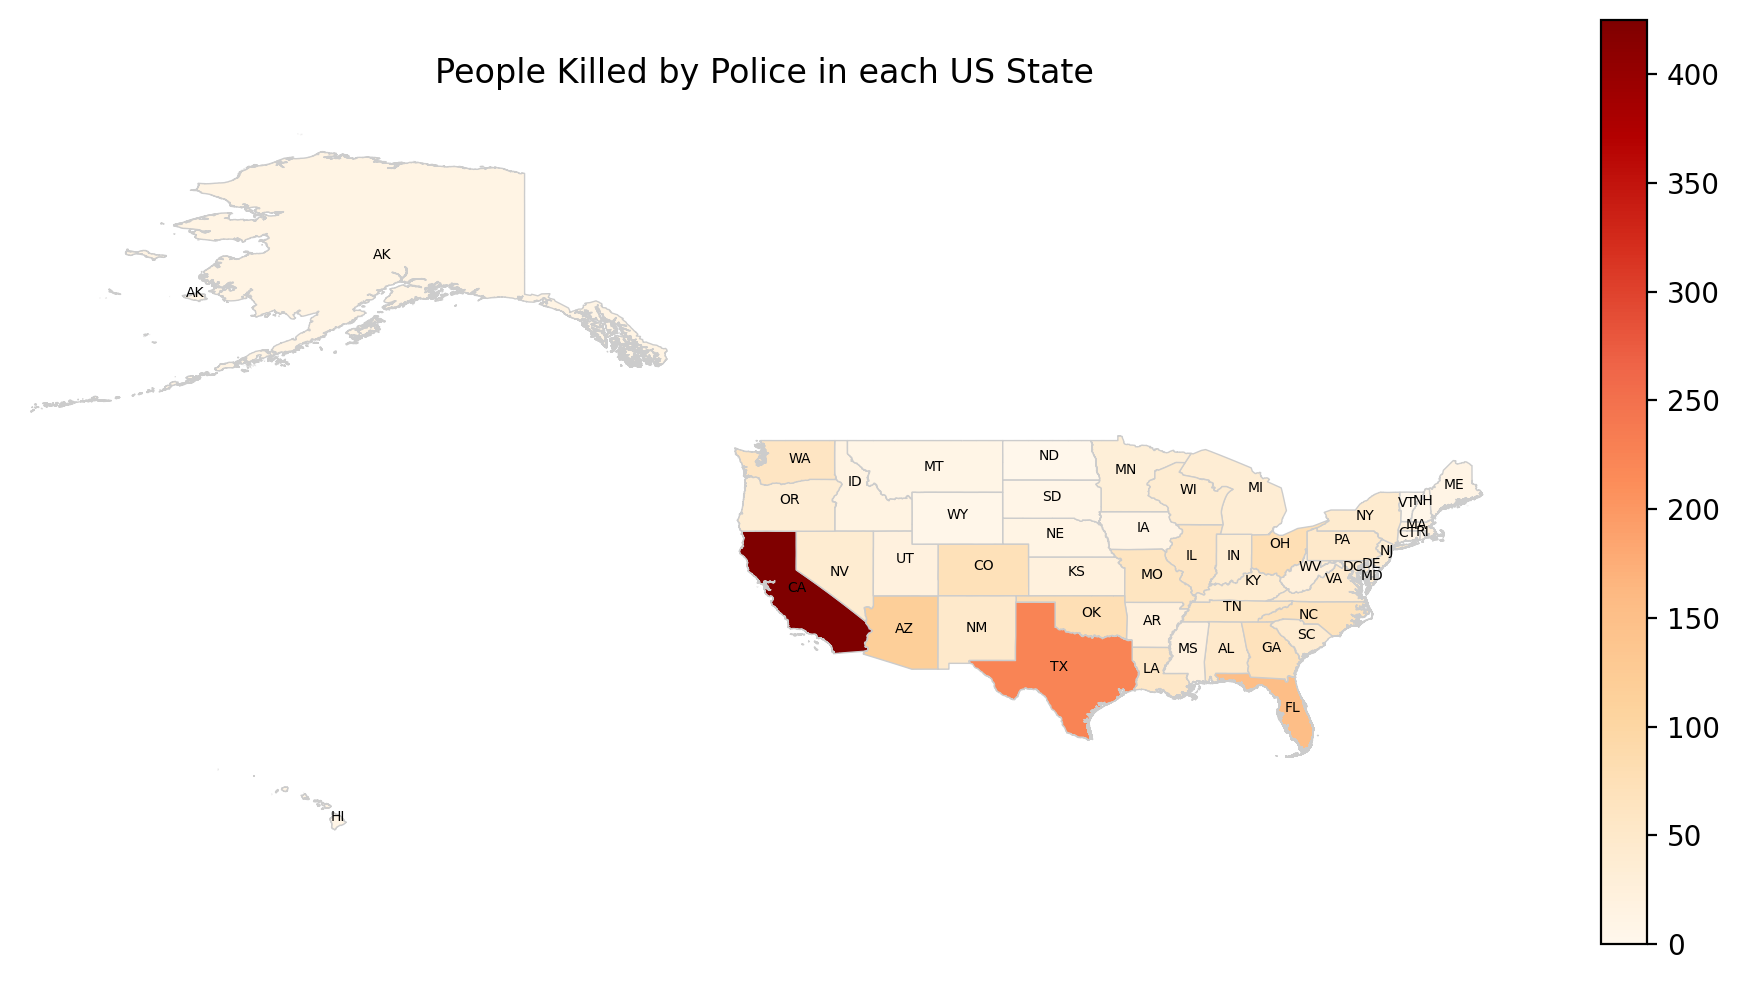

In [74]:
# set the value column that will be visualised
variable = 'total'

# set the range for the choropleth values
vmin, vmax = 0, 425

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12,6), dpi=200)

# remove the axis
ax.axis('off')

# add title
ax.set_title('People Killed by Police in each US State')

# create colorbar legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) 

# add the colorbar to the figure
fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8')

# make the map more visible/bigger
plt.xlim(-180, - 65)

# add labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coord'] = [coords[0] for coords in merged['coords']]

for index, row in merged.iterrows():
    plt.annotate(text=row.state,
                 xy=row.coord,
                 ha='center',
                 fontsize=5)

The top 3 states in poverty are Mississippi (MS), Arizona (AZ), and Georgia (GA). All of them have pretty low total number compared to California (CA). 

California (CA), Texas (TX), and Florida (FL) are the three most populated states in the US, thus the three states having the highest number of people killed is not surprising per se. However, New York (NY) looks comparatively low.

Comparing this choropleth map with the poverty chart above. There does not seem to be an obvious link between poverty rate and total number of police fatalities. 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [75]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,miscellaneous,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,miscellaneous,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


Change the <code>date</code> column into datetime object.

In [76]:
df_fatalities['date'] = pd.to_datetime(df_fatalities.date)
df_fatalities.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

Let's look at how the killings changes from year to year. Is there any improvement? Or does it get worse?

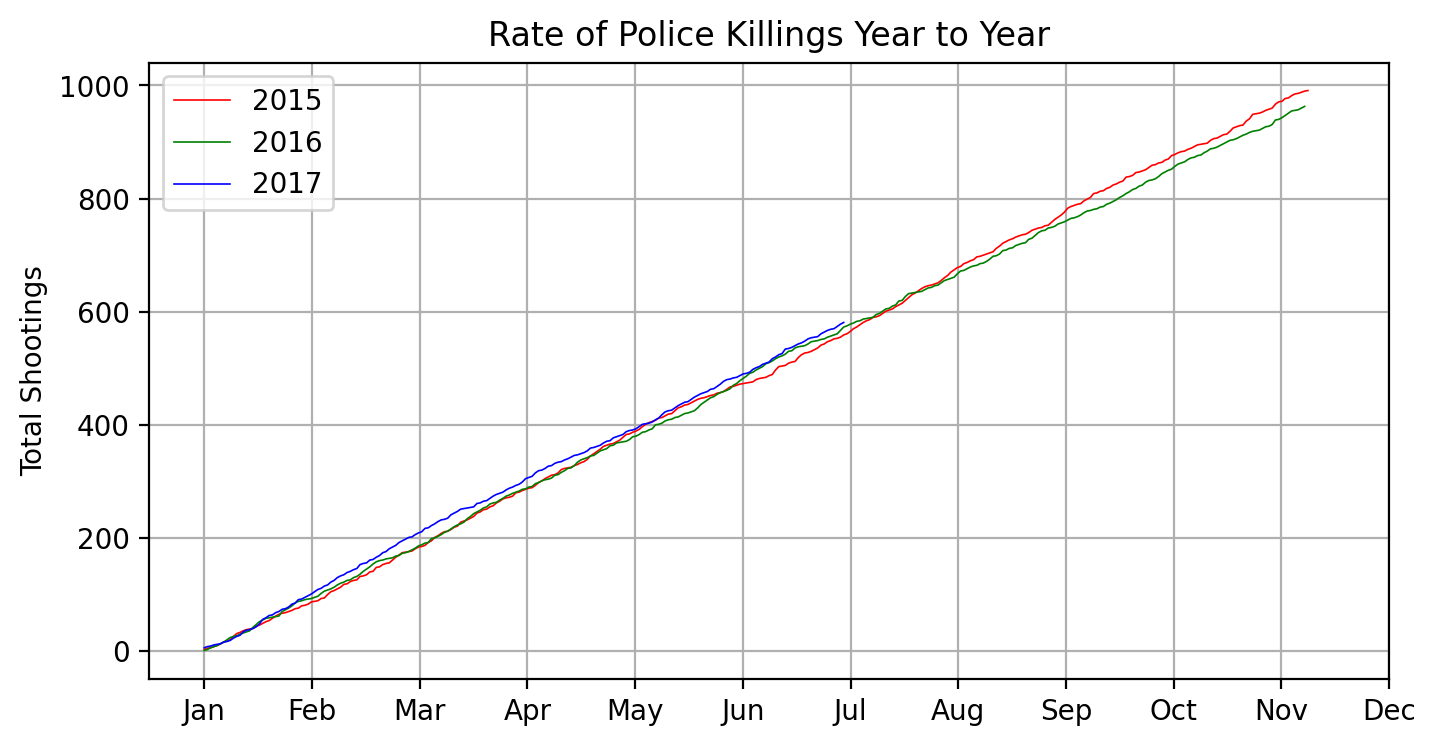

In [78]:
def cumsum_year(df, year):
    '''Return a dataframe with the cumulative sum of total killings from df_fatalities for a given year'''
    # get the selected year from df
    df_year = df[df.date.dt.year == year]
    
    # make the count column
    new_df = df_year.groupby('date', as_index=False).agg(count=('date', 'count'))
    
    # make the cumulative sum column
    new_df['year_to_date'] = new_df['count'].cumsum()
    
    #format the date to sync dataframes' timeline
    new_df['date'] = new_df.date.dt.strftime('%m-%d')
    return new_df


cumsum_2015 = cumsum_year(df_fatalities, 2015)
cumsum_2016 = cumsum_year(df_fatalities, 2016)
cumsum_2017 = cumsum_year(df_fatalities, 2017)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8,4), dpi=200)

sns.lineplot(x=cumsum_2015.date, y=cumsum_2015.year_to_date, color='red', linewidth=0.6, label='2015')
sns.lineplot(x=cumsum_2015.date, y=cumsum_2016.year_to_date, color='green', linewidth=0.6, label='2016')
sns.lineplot(x=cumsum_2015.date, y=cumsum_2017.year_to_date, color='blue', linewidth=0.6, label='2017')

plt.xticks(np.linspace(0,365,12), months)
plt.xlabel('')
plt.ylabel('Total Shootings')

plt.title('Rate of Police Killings Year to Year')
plt.grid()
plt.show()

There isn't much change in the rate of killings by police in the three years we have in the dataset. The rate remains steady and reached around 1,000 fatal shootings each year. We only have half of 2017 in our dataset and the trajectory also follows the same slope and they did, in fact, reached around 1,000 shootings that year too! 